# MA124 Maths by Computer: Assignment 4 Submission

## Machine Learning Applied to Bike Sharing Demand Data (20 Marks)

**_Student ID:_** 2003869

In a recent research article published in the journal Computer Communications, authors Sathishkumar V E, Jangwoo Park, and Yongyun Cho sought to prediction the "bike count required at each hour for the stable supply of rental bikes"[1]. They employed a number of regression models, including linear regression. The dataset used in the original study is available [here](https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand).

In this submission, I will apply **machine learning** to a modified version of the original dataset and **report the results**. 


_[1] Sathishkumar V E, Jangwoo Park, and Yongyun Cho. 'Using data mining techniques for bike sharing demand prediction in metropolitan city.' Computer Communications, Vol.153, pp.353-366, March, 2020._ [web link](https://doi.org/10.1016/j.comcom.2020.02.007).


---

I will make use of a modified data set SeoulBikeData_mod.csv from the original used in the article to remove the categorical variables, and to convert dates to months. Months have been coded by number, e.g. 1 = January, etc. Only the first six months are included in the modified dataset.

In the report ahead I will go on to set up two machine learning models, analyse the performance of their predictions based on manipulated data, and plot relevant graphs to visualise the outcome.

**Import** necessary libraries

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor

Read in and **describe the modified dataset** _SeoulBikeData_mod.csv_

In [2]:
#reading csv file and 'describing'
bikeData = pd.read_csv("SeoulBikeData_mod.csv")
bikeData.describe()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Month
count,4220.000000,4220.000000,4220.000000,4220.000000,4220.000000,4220.000000,4220.000000,4220.000000,4220.000000,4220.000000,4220.000000
mean,665.802607,11.522512,9.476967,54.729147,1.883886,1342.977725,-0.066256,0.606507,0.097275,0.061280,3.492417
std,652.252686,6.930339,11.186973,20.994968,1.084647,622.576774,12.440532,0.910329,0.962272,0.348964,1.723804
min,20.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,1.000000
25%,177.000000,6.000000,1.100000,38.000000,1.000000,770.750000,-9.800000,0.000000,0.000000,0.000000,2.000000
50%,397.000000,12.000000,10.000000,53.000000,1.700000,1495.000000,0.600000,0.020000,0.000000,0.000000,3.000000
75%,1020.250000,18.000000,19.100000,70.000000,2.600000,1972.000000,10.425000,0.992500,0.000000,0.000000,5.000000
max,3556.000000,23.000000,32.700000,98.000000,7.400000,2000.000000,24.100000,3.520000,35.000000,4.100000,6.000000


Make a **histogram** using the series of **Rented Bike Count** from the data set to visualise its distribution

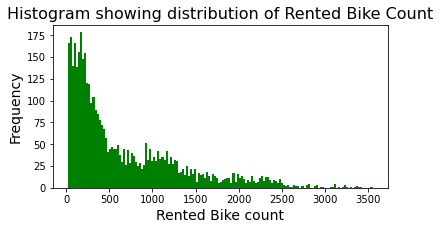

In [3]:
#Making histogram using series of Rented Bike Count
X = bikeData['Rented Bike Count']
fig = plt.figure(figsize=(6,3))
ax = fig.gca()
ax.hist(X, bins = 150, color = 'green')
plt.title("Histogram showing distribution of Rented Bike Count", fontsize=16)
plt.xlabel("Rented Bike count", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.show()

...as well as its asssociated **box plot**

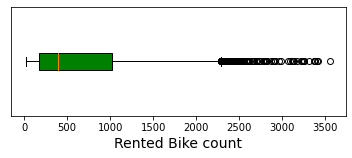

In [4]:
#Making box plot using series of Rented Bike Count
fig = plt.figure(figsize=(6,2))
ax = fig.gca()
ax.get_yaxis().set_visible(False)
graph = ax.boxplot(X, patch_artist = True, vert=False)
boxes = graph['boxes']
boxes[0].set_facecolor('green')
plt.xlabel("Rented Bike count", fontsize=14)
plt.show()

Produce **two violin plots**: one showing Rented Bike Count for different values of the **Month** and the other showing Rented Bike Count for different values of the **Hour**.

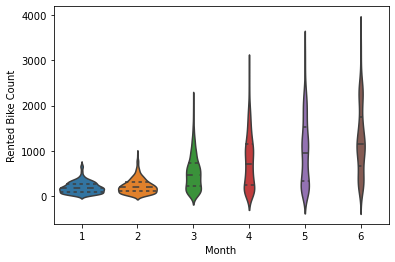

In [5]:
#Making violin plot for Rented Bike Count against the month
sns.violinplot(x='Month', y='Rented Bike Count', data=bikeData, inner='quartile')
plt.show()

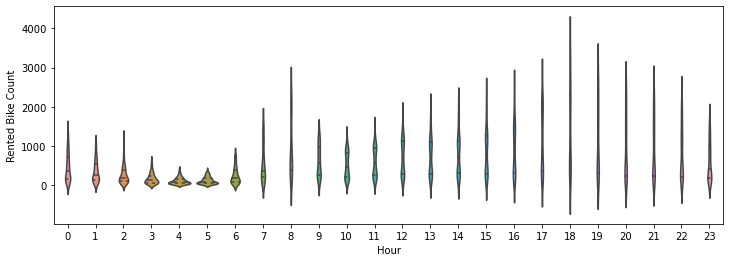

In [6]:
#Making violin plot for Rented Bike Count against the hour
fig = plt.figure(figsize=(12,4))
sns.violinplot(x='Hour', y='Rented Bike Count', data=bikeData, inner='quartile')
plt.show()

From the full Dataframe, create a **new Dataframe X** containing all the columns except Rented Bike Count and a **Series y** containing only the Rented Bike Count column. This will provide me with my **design matrix and target respectively** which I can then go on to use to apply machine learning.

In [7]:
#Separating Rented Bike count from main dataframe bikeData to get a design matrix and target
X = bikeData.drop(['Rented Bike Count'], axis=1)
Y = bikeData['Rented Bike Count']

Perform a **test-train split** to create X_train, X_test, y_train and y_test. **NB**_ Here I will be using the exact proportion used to split the data as in the article which is approx 75%:25% (exactly it is 2189/8760)_

In [8]:
#train test split with aprox 75%:25% split (the exact proportion used in article is 2189/8760)
proportion = 2189/8760
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=proportion)

Create and train a **linear regression model**

In [9]:
# Create and train a linear regression model
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

Use the trained model to **obtain y_pred**, the prediction on the test data X_test. Form the **residual** resid = y_test - y_pred.

In [10]:
# Predict Rented bike count for test data series and get residual between true and predicted values
y_pred = regr.predict(X_test)
resid = y_test - y_pred

Compute and report the: Root Mean Squared Error **(RMSE)**, Mean Absolute Error **(MAE)**, and Rsquared **(R2)**. These results should be similar to those on the top, right of Table 4 of Ref. [1]. _(Note, the modified dataset we are studying is different from that used in the article. Hence the results will not be identical. However, the procedure is very close to that used in the article.)_

In [11]:
#Compute and report the: Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and Rsquared (R2)
RMSE = np.sqrt(np.mean(resid**2))
print("The Root Mean Squared Error (RMSE) is:",RMSE)
MAE = np.mean(np.abs(resid))
print("The Mean Absolute Error (MAE) is:",MAE)
R2 = r2_score(y_test, y_pred)
print("... and Rsquared (R2) is:",R2)

The Root Mean Squared Error (RMSE) is: 403.2935453742233
The Mean Absolute Error (MAE) is: 293.28159752070127
... and Rsquared (R2) is: 0.6159602641415858


_Produce the following plots_: **A scatter plot** of **resid as a function of y_test** _(Rented Bike Count)_ corresponding to Fig. 9 of Ref. [1]. _Unlike Fig. 9 of the paper, I will use a **colormap to plot the different months** in different colours._

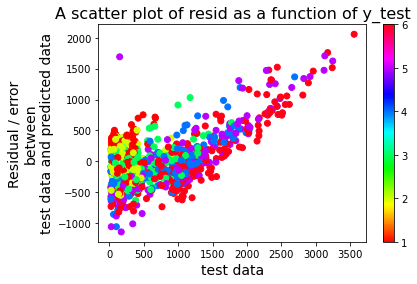

In [12]:
# A scatter plot of resid as a function of y_test, where different colours refer to different times of the month
colours = X_test['Month']
plt.scatter(y_test, resid, c=colours, cmap='hsv')
plt.colorbar()
plt.xlabel("test data", fontsize=14)
plt.ylabel('Residual / error''\n''between''\n''test data and predicted data',fontsize=14)
plt.title("A scatter plot of resid as a function of y_test", fontsize=16)
plt.show()

**A Histograms** of **y_test** and of **y_pred** (on the same plot).

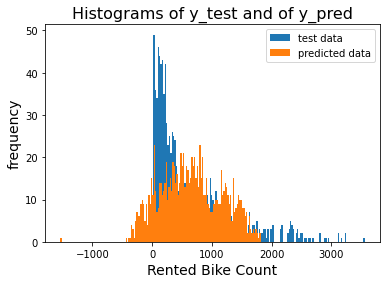

In [13]:
# Histograms of y_test and of y_pred on the same graph
plt.hist(y_test, bins=150, label="test data")
plt.hist(y_pred, bins=150, label="predicted data")
plt.xlabel("Rented Bike Count", fontsize=14)
plt.ylabel("frequency", fontsize=14)
plt.legend()
plt.title("Histograms of y_test and of y_pred", fontsize=16)
plt.show()

**A scatter plot** of **resid as a function of X_test['month']**. Where a colormap will be used to indicate the absolute value of resid.

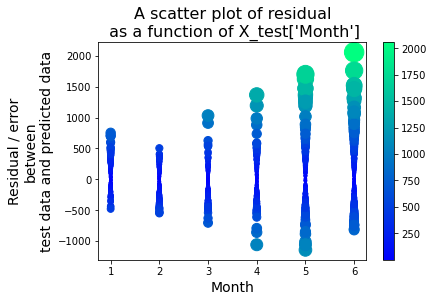

In [14]:
#A scatter plot of resid as a function of X_test['month']
#Where cmap is used to indicate absolute value of resid
colours = np.abs(resid)
sizes = (np.abs(resid)**1.5 + 1300)/250

plt.scatter(X_test['Month'], resid, c=colours, s=sizes, cmap='winter')
plt.colorbar()
plt.title("A scatter plot of residual""\n"" as a function of X_test['Month']", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel('Residual / error''\n''between''\n''test data and predicted data',fontsize=14)
plt.show()

**A scatter plot** of **resid as a function of X_test['Hour']**. Similarily to above again, a colormap will be used to indicate the absolute value of resid.

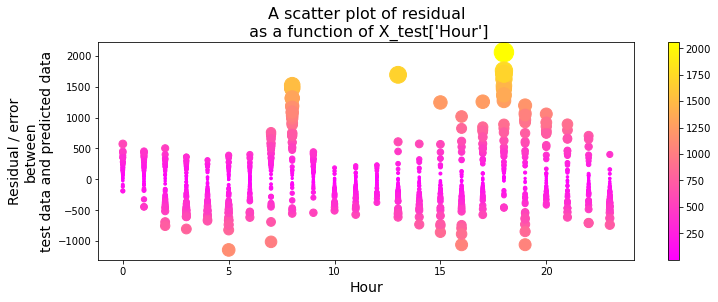

In [15]:
#A scatter plot of resid as a function of X_test['hour']
#Where cmap is used to indicate absolute value of resid

colours = np.abs(resid)
sizes = (np.abs(resid)**1.5 + 1300)/250

fig = plt.figure(figsize=(12,4))
ax = fig.gca()
plt.scatter(X_test['Hour'], resid, c=colours, s=sizes, cmap='spring')
plt.colorbar()
plt.title("A scatter plot of residual""\n"" as a function of X_test['Hour']", fontsize=16)
plt.xlabel("Hour", fontsize=14)
plt.ylabel('Residual / error''\n''between''\n''test data and predicted data',fontsize=14)
plt.show()

You will see in Ref. [1] that most of the results involve "Trees". There are a number of types of trees used in machine learning. Sklearn provides a DecisionTreeRegressor. I will go on to create and train a DecisionTreeRegressor with max_depth=6. 
> - I will obtain **y_pred** with a trained model.
> - Compute and report the: Root Mean Squared Error **(RMSE)**, Mean Absolute Error **(MAE)**, and Rsquared **(R2)**.
> - Plot **histograms** of of y_test and y_pred (on the same plot).

In [16]:
regrTree = DecisionTreeRegressor(max_depth=6)
regrTree.fit(X_train, y_train)

y_pred_tree = regrTree.predict(X_test)
residTree = y_test - y_pred_tree

RMSE = np.sqrt(np.mean(residTree**2))
print("The Root Mean Squared Error (RMSE) for a decision tree regresor model is:",RMSE)
MAE = np.mean(np.abs(residTree))
print("The Mean Absolute Error (MAE) for a decision tree regresor model is:",MAE)
R2 = r2_score(y_test, y_pred_tree)
print("... and Rsquared (R2) for a decision tree regresor model is:",R2)

The Root Mean Squared Error (RMSE) for a decision tree regresor model is: 300.9753726585349
The Mean Absolute Error (MAE) for a decision tree regresor model is: 182.34030449981927
... and Rsquared (R2) for a decision tree regresor model is: 0.7861075074420589


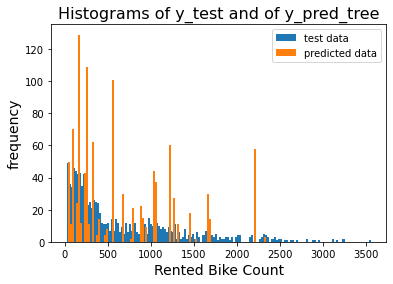

In [17]:
# Histograms of y_test and of y_pred_tree on the same graph
plt.hist(y_test, bins=150, label="test data")
plt.hist(y_pred_tree, bins=100, label="predicted data")
plt.xlabel("Rented Bike Count", fontsize=14)
plt.ylabel("frequency", fontsize=14)
plt.legend()
plt.title("Histograms of y_test and of y_pred_tree", fontsize=16)
plt.show()

Note that compared to the linear regression model, the decision tree model, save for a few outliers, is much **more accurate**. 

This can be seen by **comparing the histogram** here with the one corresponding to the linear regression model at the start of the report. The histogram here is more alike to the true distribution that the one shown previously.

Furthermore, from the analysis, you can also note how the decision model's **R2 number** is greater than that of the linear model, again indicating that the prediction of the decision tree regressor are more accurate than that of the linear one.